In [1]:
"""
Simply train the G by accounting for the noise type...


"""
%run common/imp_and_args1.ipynb
if ntbk:
    sys.argv = ['main', "--batchSize", "4",
                '--niter', '100', "--noise", "uniform"]#"--mergePreGen"]#,,  "--loadPreGPath", "preG.mdl" ]#, ]#, "--critic_iters", "5"] , '--useLN'
print(sys.argv)
#Now add some parser argument here, commented examples follow
#Boolean, action is what it will be set to when passed
#parser.add_argument('--notLog', action='store_true', help='if passed, no logging will happen. Logging is off for jupyter anyways.;')
#String
#parser.add_argument('--opFolder', default='', help='Override the logging folder.')
#int
#parser.add_argument('--seed', type=int, default=1, help='Seed for pyTorcj.')
#and float
#parser.add_argument('--clamp_lower', type=float, default=-0.01)


%run common/args_and_rest.ipynb
g_nz =  opt.nz
fixed_noise = torch.randn(opt.batchSize, g_nz)#, 1, 1)
if cuda:
    fixed_noise = fixed_noise.cuda(gpu)
%run common/Utils.ipynb
%config Completer.use_jedi = False

['main', '--batchSize', '4', '--niter', '100', '--noise', 'uniform']
Namespace(adam=False, batchSize=4, beta1=0.5, beta2=0.9, clamp_lower=-0.01, clamp_upper=0.01, critic_iters=5, dataroot='/home/aknirala/data/lsun', dataset='diverse_clocks', dim=64, fineSize=64, hm_gen_size=30, lambda_value=10.0, loadSize=96, lrD=0.0002, lrG=0.0002, nEpochs=5, nc=3, ndf=64, ngf=64, ngpu=1, niter=100, noCuda=False, noise='uniform', notLog=False, nz=100, opFolder='', resumeFldr='', seed=1, workers=8)
OP folder won't be created as we are in jupyter notebook and logging is off
Arguments are:  Namespace(adam=False, batchSize=4, beta1=0.5, beta2=0.9, clamp_lower=-0.01, clamp_upper=0.01, critic_iters=5, dataroot='/home/aknirala/data/lsun', dataset='diverse_clocks', dim=64, fineSize=64, hm_gen_size=30, lambda_value=10.0, loadSize=96, lrD=0.0002, lrG=0.0002, nEpochs=5, nc=3, ndf=64, ngf=64, ngpu=1, niter=100, noCuda=False, noise='uniform', notLog=False, nz=100, opFolder='', resumeFldr='', seed=1, workers=8)
Len

In [2]:
%run freezed/WGAN_PG.ipynb

In [3]:
G = GoodGenerator(opt.nz)
plog(G)
D = GoodDiscriminator()
plog(D)

GoodGenerator(
  (L): Linear(in_features=100, out_features=8192, bias=True)
  (R1): ResidualBlockUp(
    (s_cut): UpsampleConv(
      (main): Sequential(
        (G_R1_up_sample_s_cut_up_sample): UpsamplingNearest2d(scale_factor=2.0, mode=nearest)
        (G_R1_up_sample_s_cut_conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (nmlz1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (nmlz2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (R1): ReLU()
    (conv1): UpsampleConv(
      (main): Sequential(
        (G_R1_up_sample_conv1__up_sample): UpsamplingNearest2d(scale_factor=2.0, mode=nearest)
        (G_R1_up_sample_conv1__conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
    (R2): ReLU()
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (R2): ResidualBlockUp(
    (s_cut): Upsample

In [4]:
#Now declare the variables!!
optD = optim.Adam(D.parameters(), lr=opt.lrD, betas=(opt.beta1, opt.beta2))
optG = optim.Adam(G.parameters(), lr=opt.lrG, betas=(opt.beta1, opt.beta2))
optGDec = optim.Adam(G.parameters(), lr=opt.lrG, betas=(opt.beta1, opt.beta2))
R_COST = []
F_COST = []
W_DIST = []
D_COST = []
G_COST = []
GP = []

iters = -1
try:
    loadWeights(opt.resumeFldr, loss_dict={
                        "R_COST.pkl": R_COST,
                        "F_COST.pkl": F_COST,
                        "W_DIST.pkl": W_DIST,
                        "D_COST.pkl": D_COST,
                        "G_COST.pkl": G_COST,
                    })
except:
    plog("Encountered error while loading weights!!")

one = torch.FloatTensor([1])
mone = one * -1
if cuda:
    one = one.cuda(gpu)
    mone = mone.cuda(gpu)
    D = D.cuda(gpu)
    G = G.cuda(gpu)

New folder would be created nothing to resume.


Epoch:  0  of  5  iters:  -1


 D_real 1.000, D_fake -1.000, gradient_penalty 10.000, G_cost 1.000, DEC_loss1.000,  -1:   0%|          | 0/50000 [00:00<?, ?it/s]

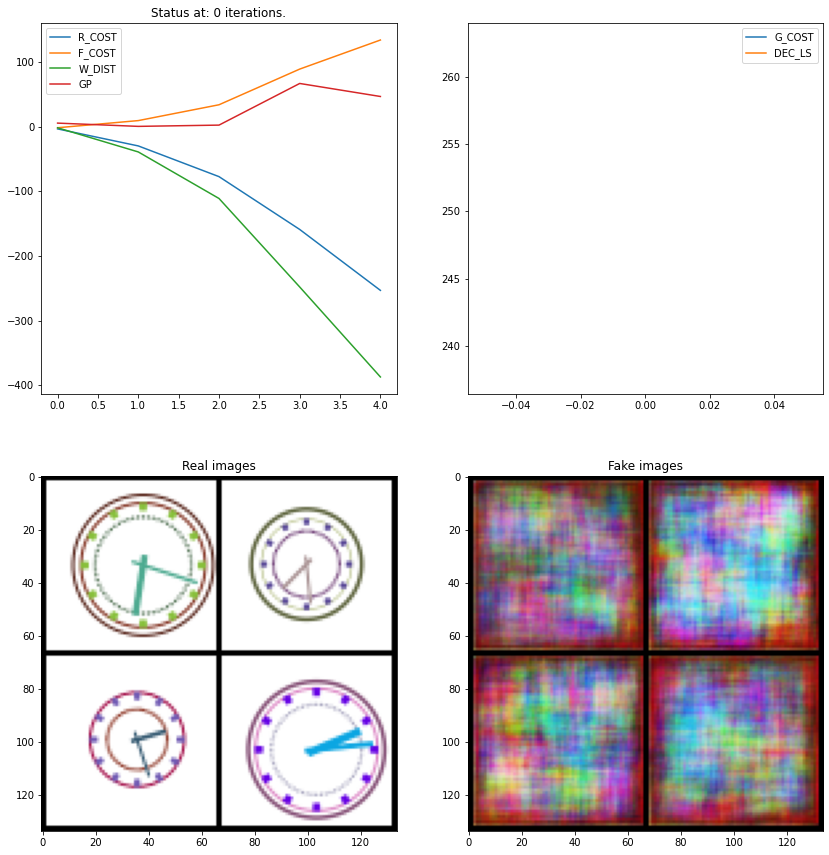

 D_real 1.000, D_fake -1.000, gradient_penalty 10.000, G_cost 1.000, DEC_loss1.000,  0:   0%|          | 2/50000 [00:01<10:59:39,  1.26it/s]

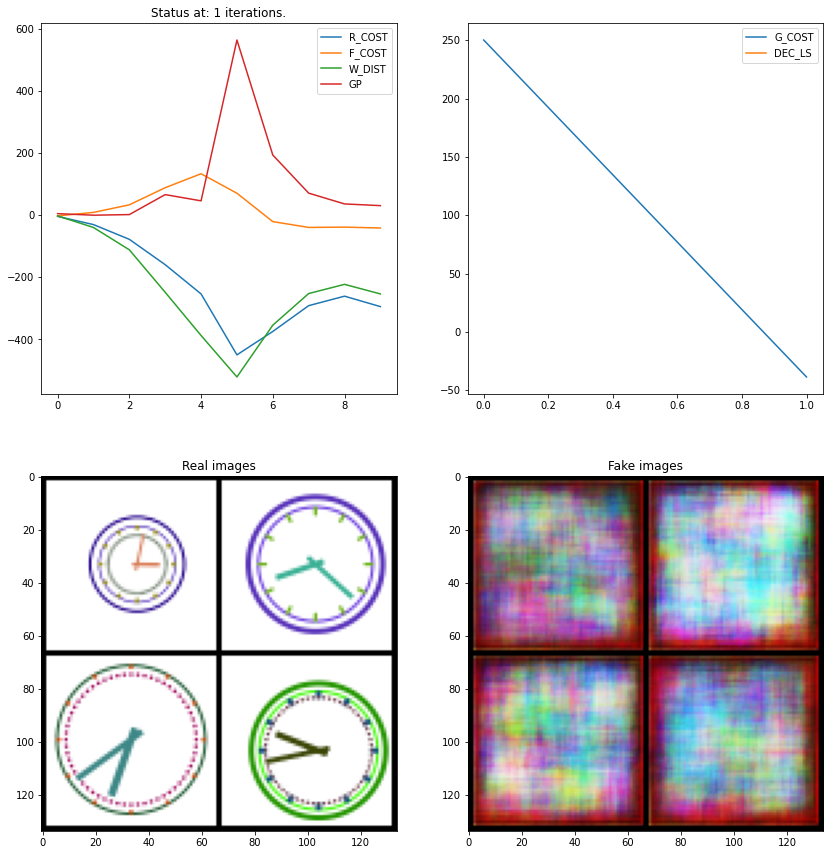

 D_real 1.000, D_fake -1.000, gradient_penalty 10.000, G_cost 1.000, DEC_loss1.000,  9:   0%|          | 11/50000 [00:07<8:59:41,  1.54it/s]

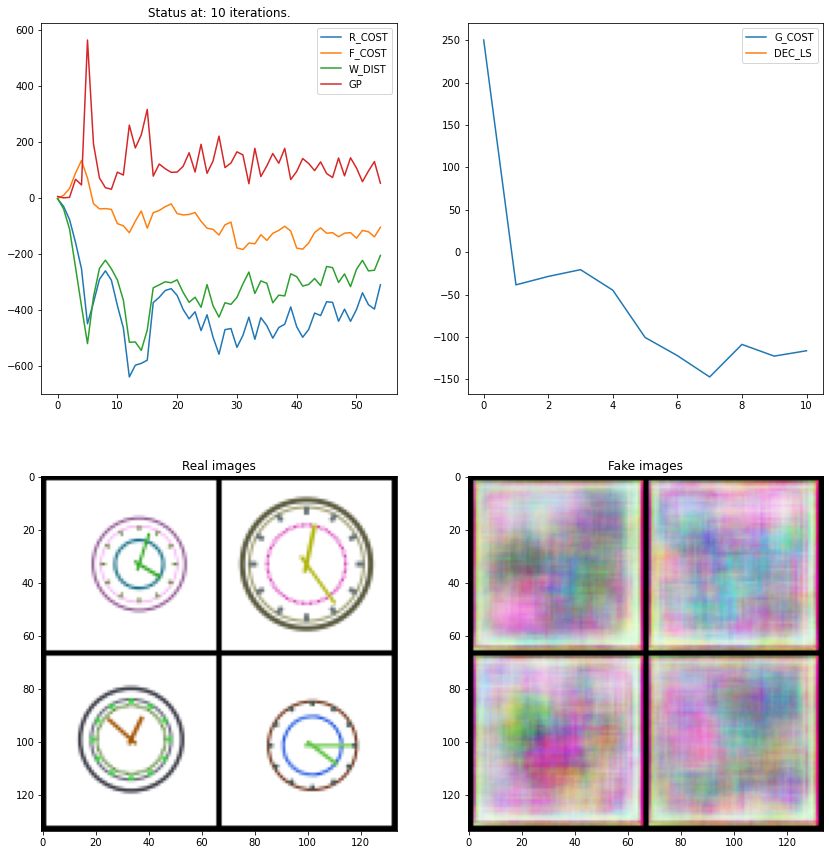

 D_real 1.000, D_fake -1.000, gradient_penalty 10.000, G_cost 1.000, DEC_loss1.000,  19:   0%|          | 21/50000 [00:14<8:55:15,  1.56it/s] 

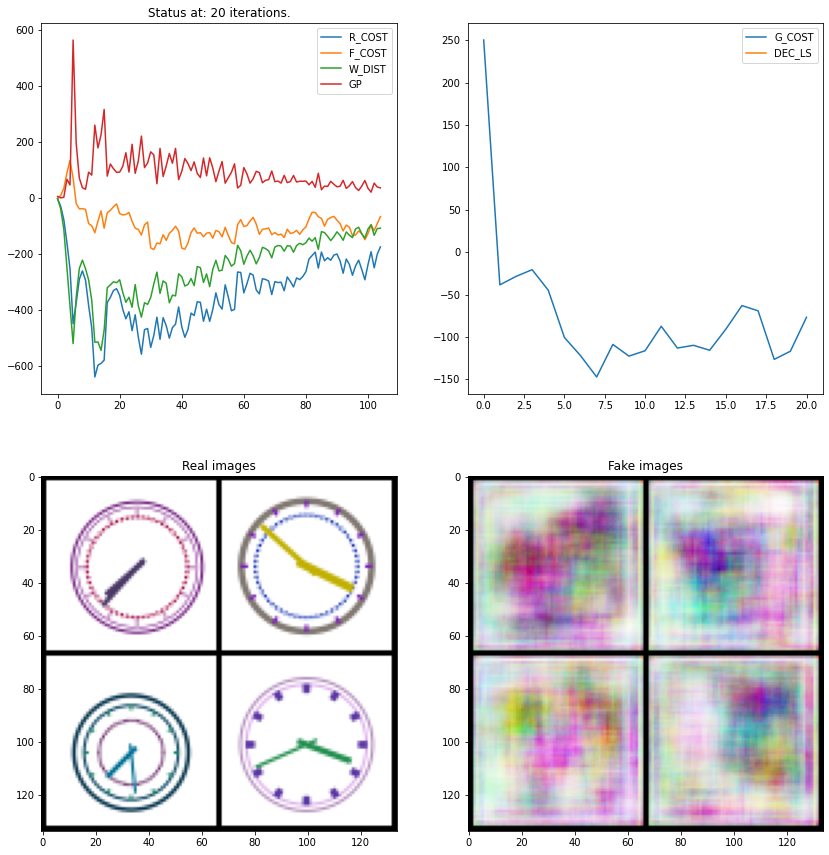

 D_real 1.000, D_fake -1.000, gradient_penalty 10.000, G_cost 1.000, DEC_loss1.000,  27:   0%|          | 29/50000 [00:20<8:53:10,  1.56it/s] 

KeyboardInterrupt: 

In [5]:
data_len = len(dataloader)
D_real = 1
D_fake = -1
gradient_penalty = opt.lambda_value
G_cost = 1
loss = 1
for epoch in range(opt.nEpochs):
    plog("Epoch: ", epoch, " of ", opt.nEpochs, " iters: ", iters)
    data_iter = iter(dataloader)
    
    i = 0
    pbar = tqdm(total=len(data_iter)//opt.critic_iters)
    #pbar = tqdm(range(len(data_iter)//opt.critic_iters))
    while i < data_len - opt.critic_iters:
        pbar.set_description( (" D_real {:.3f}, D_fake {:.3f}, "\
        +  "gradient_penalty {:.3f}, G_cost {:.3f}, {}").format(
            float(D_real), float(D_fake), 
            float(gradient_penalty), float(G_cost), iters))
        pbar.update(1)
        i += 5
        iters += 1
        reals = []
        noises = []
        for iter_d in range(opt.critic_iters):
            reals.append(next(data_iter)[0])
            if opt.noise == "uniform":
                noises.append(torch.FloatTensor(opt.batchSize, g_nz).uniform_(-1, 1))
            else:
                noises.append(torch.randn(opt.batchSize, g_nz))
        noises.append(torch.randn(opt.batchSize, g_nz))
        do_WPG_iters(reals, noises, 
                     [G, D, optG, optD], 
                     [R_COST, F_COST, GP, W_DIST, D_COST, G_COST])
        
        if iters%5000 == 0 or iters in disp_itrs:
            generate_image([D, G, optD, optG],
                           iters, reals[-1], 
                           loss_dict1 = {"R_COST":R_COST,
                                        "F_COST":F_COST,
                                        "W_DIST":W_DIST,
                                        #"D_COST":D_COST,
                                        "GP":GP}, 
                           loss_dict2 = {"G_COST":G_COST
                                        })#,
                           #oToPickle = oToPickle)#, fakes.data)
        #if ntbk and iters > 500:
        #    break
    pbar.close()
#with batch